# Setup
  # P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  # Modeling wine preferences by data mining from physicochemical properties.
  # In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.
***

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [2]:
#standard plot size
plt.rcParams['figure.figsize'] = (15,10)

# Standard colour scheme.
plt.style.use('ggplot')

In [3]:
# Load in the red wine data from the url
df = pd.read_csv("https://raw.githubusercontent.com/John-Dubber/EmergingTechnologiesAssessment/main/winequality/winequality-red.csv")

In [4]:
# Check out what the data looks like
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Summary statistics
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Visualisation
***

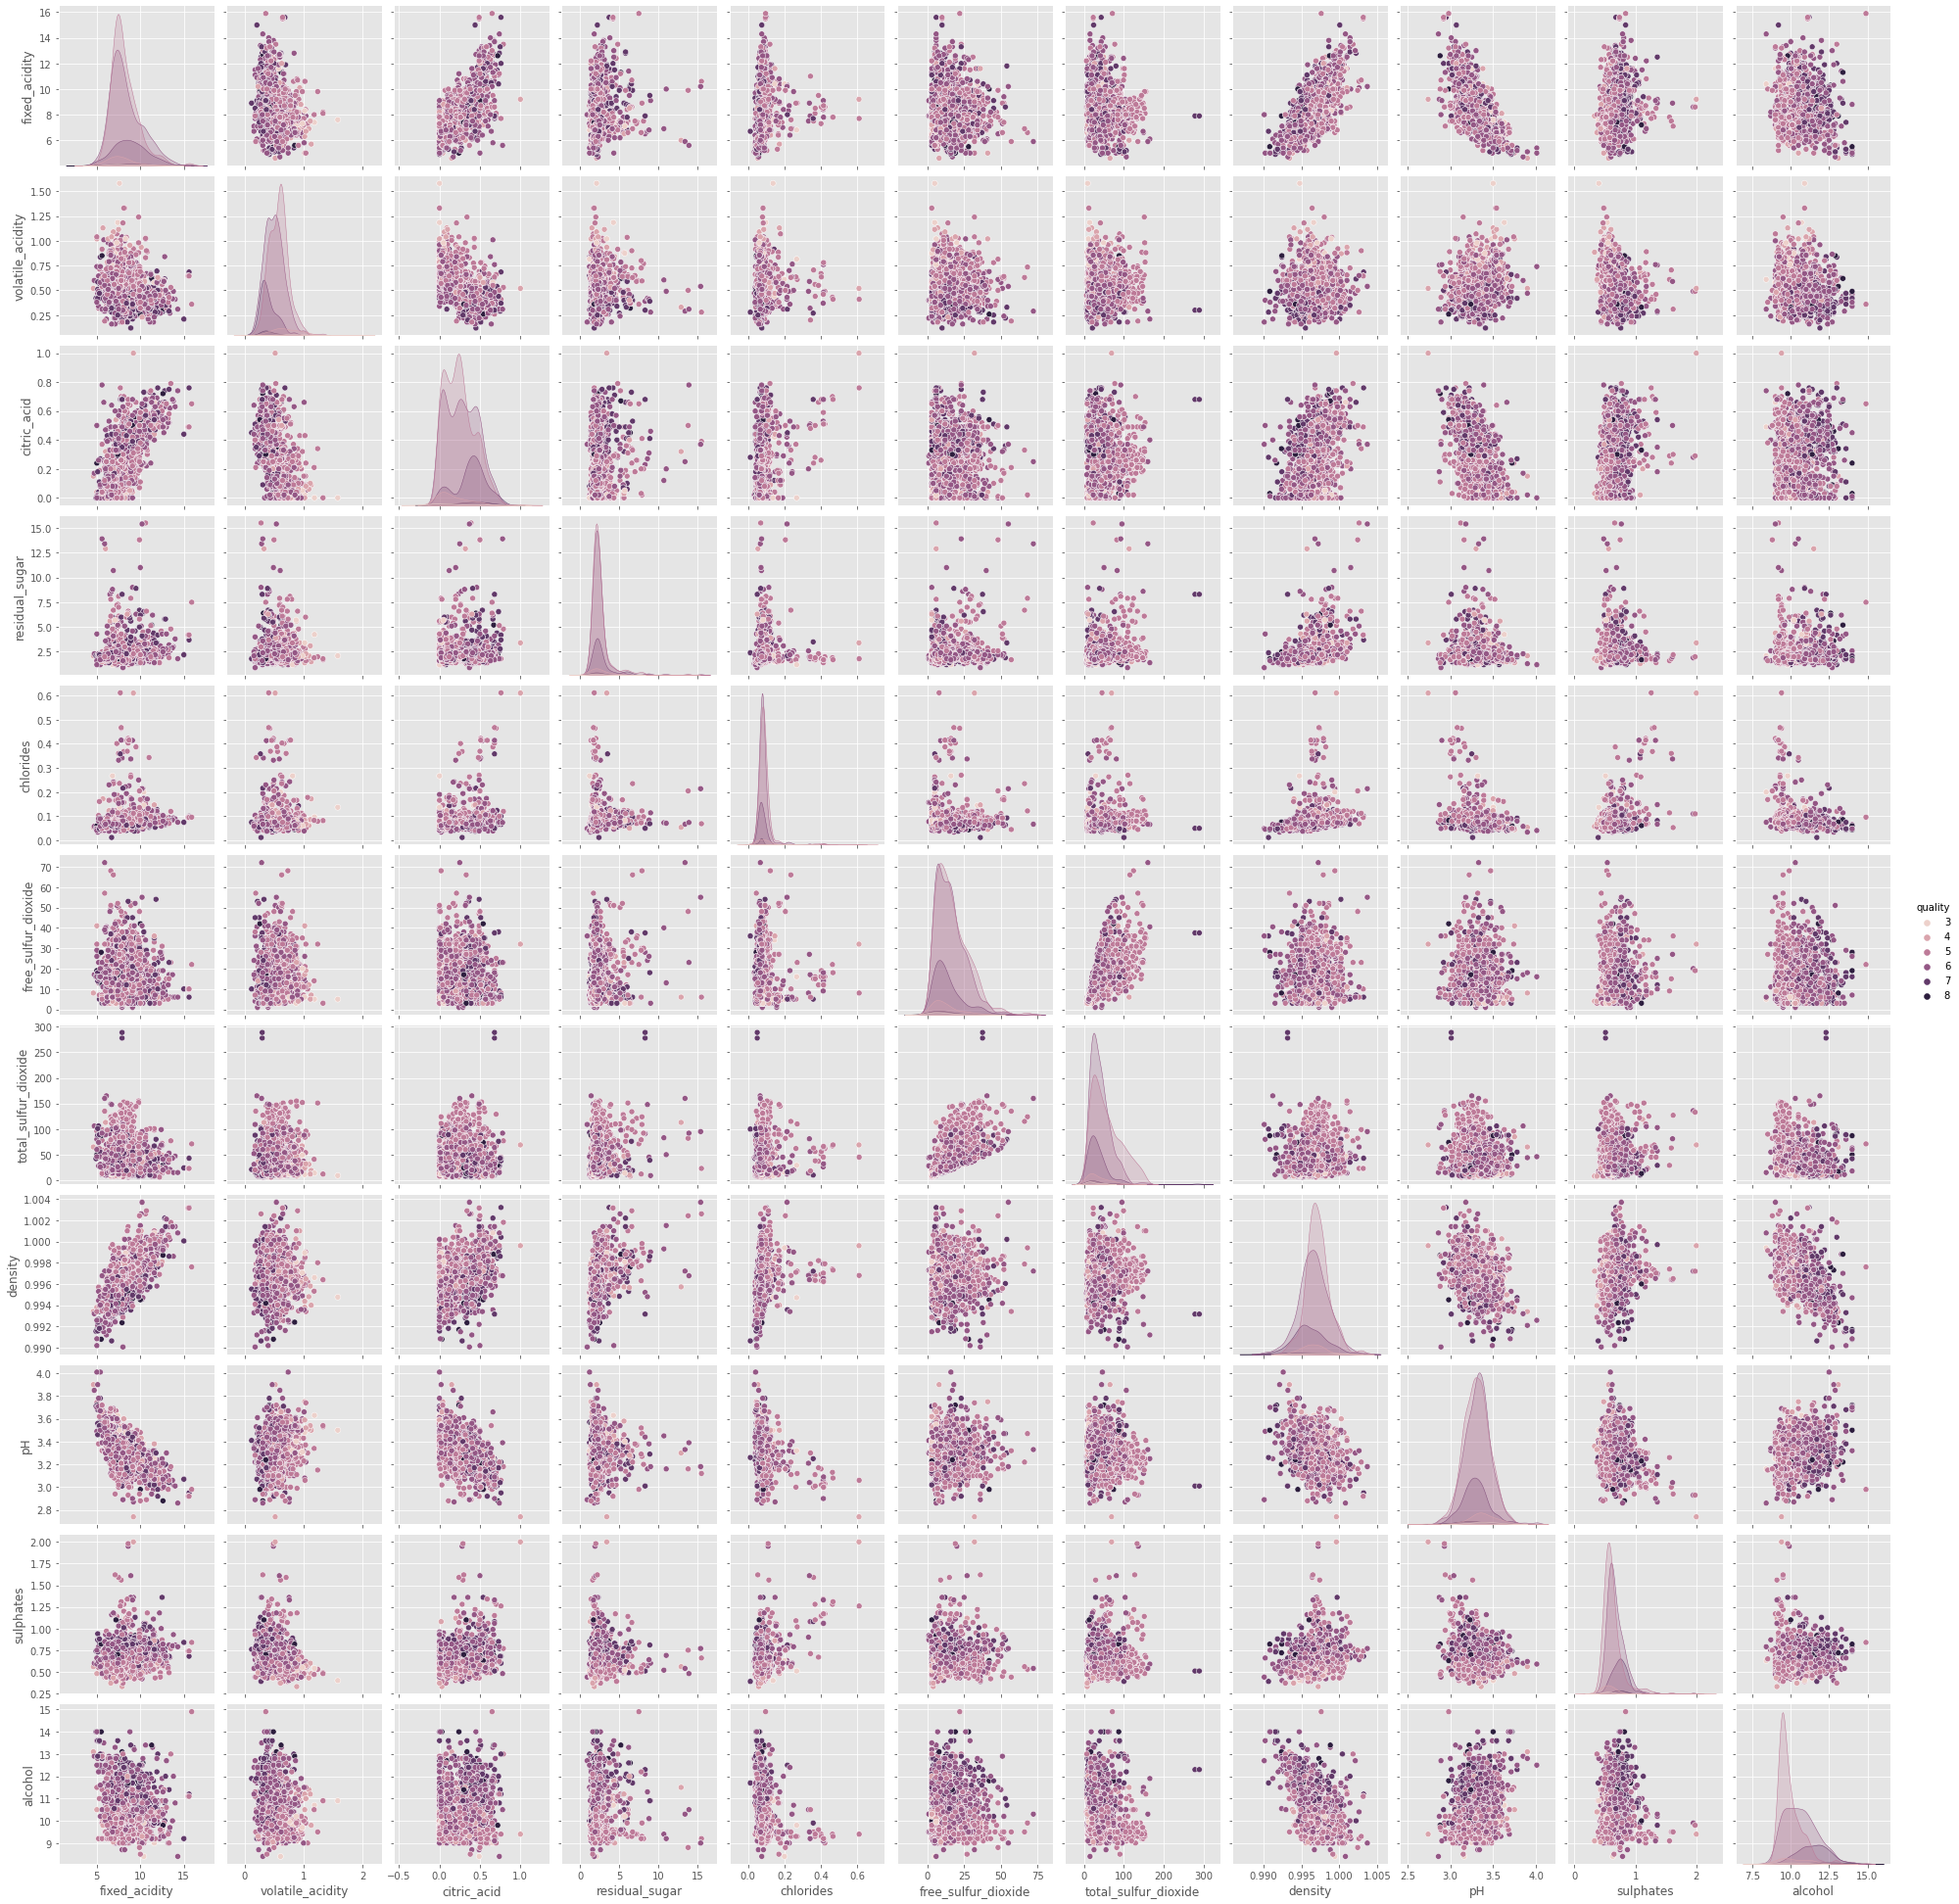

In [6]:
# Scatterplots and kdes
sns.pairplot(df, hue='quality');

# Two Dimensions
***

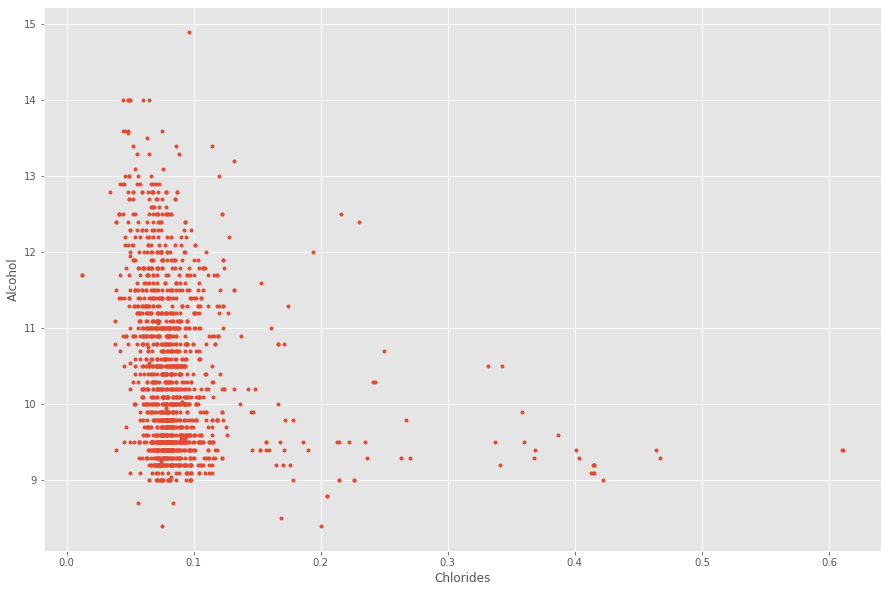

In [7]:
# New figure
fig, ax = plt.subplots()

#scatter plot
ax.plot(df['chlorides'], df['alcohol'],'.')

# Set axis labels
ax.set_xlabel('Chlorides');
ax.set_ylabel('Alcohol');

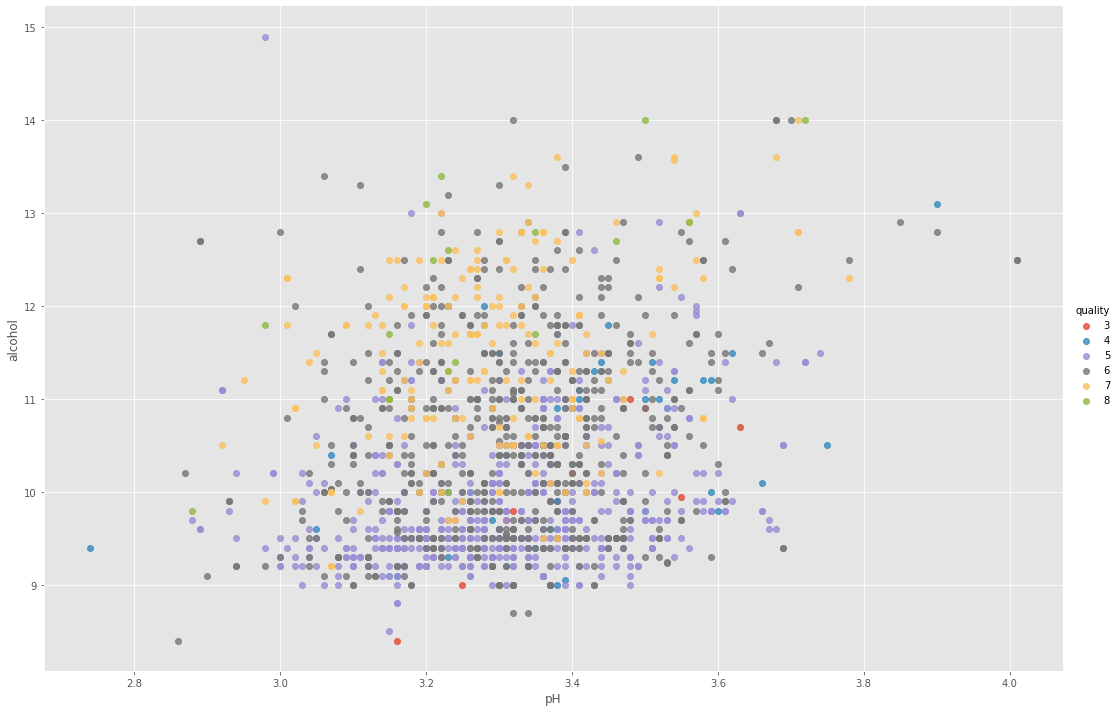

In [8]:
#seaborn is great for creating complex plots with one command
sns.lmplot(x="pH", y="alcohol", hue='quality', data=df, fit_reg=False, height = 10 , aspect= 1.5);

# Using pyplot
***

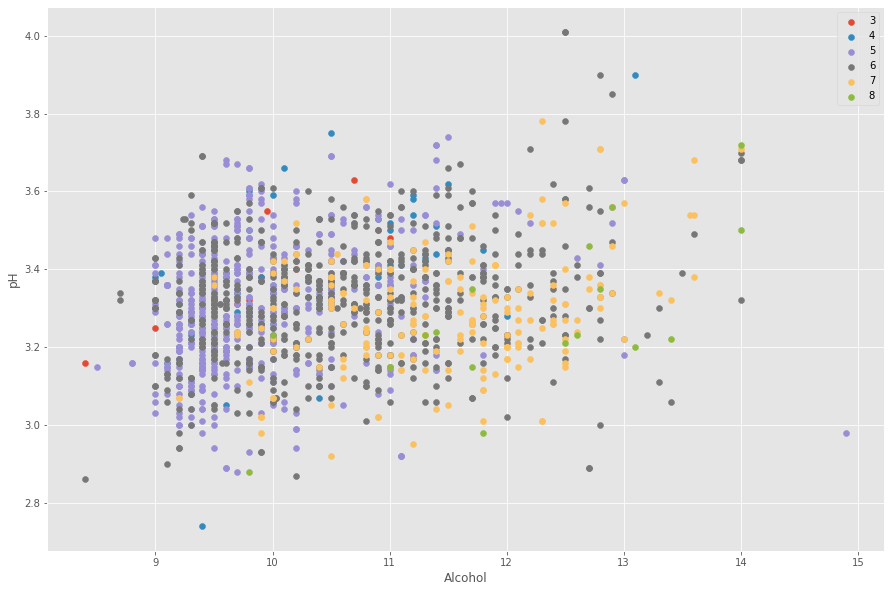

In [9]:
# Segregate the data
quality3 = df[df['quality'] == 3]
quality4 = df[df['quality'] == 4]
quality5 = df[df['quality'] == 5]
quality6 = df[df['quality'] == 6]
quality7 = df[df['quality'] == 7]
quality8 = df[df['quality'] == 8]

# New PLot
fig, ax = plt.subplots()

# Scatter plots
ax.scatter(quality3['alcohol'], quality3['pH'], label = 3)
ax.scatter(quality4['alcohol'], quality4['pH'], label = 4)
ax.scatter(quality5['alcohol'], quality5['pH'], label = 5)
ax.scatter(quality6['alcohol'], quality6['pH'], label = 6)
ax.scatter(quality7['alcohol'], quality7['pH'], label = 7)
ax.scatter(quality8['alcohol'], quality8['pH'], label = 8)

# Show the legend
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();


In [10]:
# How the segregation works.
df['quality'] == 3

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool

In [11]:
df[df['quality'] == 3].head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


# Using groupby()
***

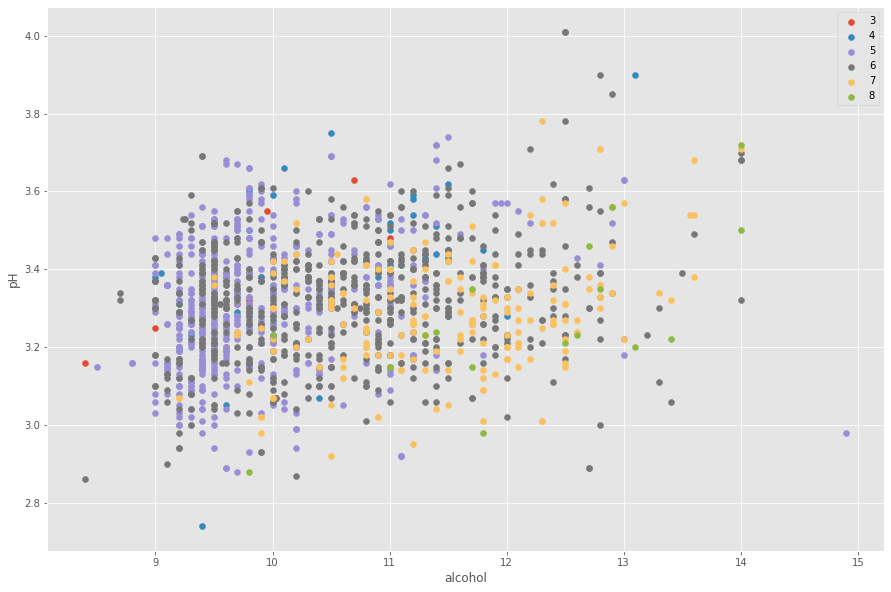

In [12]:
# New Plot
fig, ax = plt.subplots()

#Using pandas groupby()
for quality, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=quality)

# Show the legend
ax.set_xlabel('alcohol')
ax.set_ylabel('pH')
ax.legend();

In [13]:
# Group by typically takes a categorical variable
x = df.groupby('quality')
x

In [14]:
x.mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [15]:
# Looping through groupby()
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '3'
j looks like:
     fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
459           11.6             0.580         0.66            2.20      0.074   
517           10.4             0.610         0.49            2.10      0.200   
690            7.4             1.185         0.00            4.25      0.097   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
459                 10.0                  47.0   1.0008  3.25       0.57   
517                  5.0                  16.0   0.9994  3.16       0.63   
690                  5.0                  14.0   0.9966  3.63       0.54   

     alcohol  quality  
459      9.0        3  
517      8.4        3  
690     10.7        3  


i is: '4'
j looks like:
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
18            7.4              0.59         0.08             4.4      0.086   
38            5.7              1.13         0.09             1.5     

# Test and Train Split#
***

In [16]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [17]:
# Show some training data.
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
475,9.6,0.680,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,5
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4,5
1557,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,6
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
456,8.9,0.590,0.39,2.3,0.095,5.0,22.0,0.99860,3.37,0.58,10.3,5


In [18]:
# The indices of the train array
train.index

Int64Index([ 475,   53, 1557,   15,  456,   41, 1303,    5,  751, 1120,
            ...
            1018,  892, 1508,  302,  412, 1159, 1245, 1255,  417,  962],
           dtype='int64', length=1199)

In [19]:
test.index.size

400

# Two Dimensions: Test Train Split
***

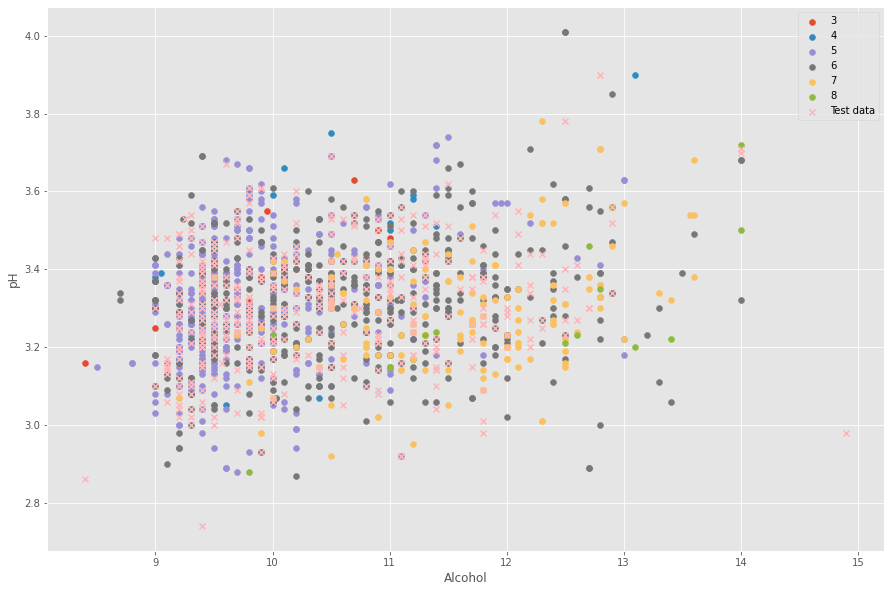

In [20]:
# Segregate the data
quality3 = train[train['quality'] == 3]
quality4 = train[train['quality'] == 4]
quality5 = train[train['quality'] == 5]
quality6 = train[train['quality'] == 6]
quality7 = train[train['quality'] == 7]
quality8 = train[train['quality'] == 8]

# New PLot
fig, ax = plt.subplots()

# Scatter plots for training data
ax.scatter(quality3['alcohol'], quality3['pH'], marker = 'o', label = 3)
ax.scatter(quality4['alcohol'], quality4['pH'], marker = 'o', label = 4)
ax.scatter(quality5['alcohol'], quality5['pH'], marker = 'o', label = 5)
ax.scatter(quality6['alcohol'], quality6['pH'], marker = 'o', label = 6)
ax.scatter(quality7['alcohol'], quality7['pH'], marker = 'o', label = 7)
ax.scatter(quality8['alcohol'], quality8['pH'], marker = 'o', label = 8)

#Scatter plot for testing data
ax.scatter(test['alcohol'], test['pH'], marker='x', label = 'Test data')

# Show the legend
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

# Two Dimensions: Inputs and Outputs
***

In [21]:
# Give the inputs and outputs convenient names
inputs, outputs = train[['alcohol','pH']], train['quality']

In [22]:
# Peek at the inputs
inputs.head()

,alcohol,pH
475,10.2,3.14
53,9.4,3.20
1557,11.0,3.54
15,9.2,3.17
456,10.3,3.37


In [23]:
# Peek at the outputs
outputs.head()

475     5
53      5
1557    6
15      5
456     5
Name: quality, dtype: int64

# Two Dimensions: Logistic regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
***

In [24]:
# Create a new classifier
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data
lre.fit(inputs, outputs)

C:\Users\jonny\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [25]:
# Ask the classifier to classify the test data
predictions = lre.predict(test[['alcohol','pH']])
predictions

array([5, 5, 5, 5, 6, 5, 7, 5, 6, 5, 7, 6, 5, 5, 7, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 7, 6, 5, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 5, 6, 5,
       5, 6, 5, 6, 6, 7, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6,
       5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 5, 5, 7, 6, 5, 7, 5, 6, 5, 6,

In [26]:
predictions == test['quality']

10       True
1358     True
1174    False
512     False
471      True
        ...  
891      True
1326     True
1088    False
42       True
1577     True
Name: quality, Length: 400, dtype: bool

In [27]:
lre.score(test[['alcohol','pH']], test['quality'])

0.5825

# Two Dimensions: Misclassified
***

In [28]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

C:\Users\jonny\AppData\Local\Temp/ipykernel_16220/2800452076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,predicted
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5,5
1358,7.4,0.64,0.17,5.4,0.168,52.0,98.0,0.99736,3.28,0.50,9.5,5,5
1174,7.6,0.36,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6,5
512,10.7,0.40,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7,6,5
471,9.6,0.54,0.42,2.4,0.081,25.0,52.0,0.99700,3.20,0.71,11.4,6,6


In [29]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['quality']]
misclass

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,predicted
1174,7.6,0.360,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6,5
512,10.7,0.400,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7,6,5
170,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1,4,5
1277,7.0,0.690,0.00,1.9,0.114,3.0,10.0,0.99636,3.35,0.60,9.7,6,5
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,9.4,0.395,0.46,4.6,0.094,3.0,10.0,0.99639,3.27,0.64,12.2,7,6
150,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6,5
155,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,5,6
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,7


In [30]:
# Eyeball the descriptive statistics for the species.
train.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.625000,0.679167,0.169722,2.730556,0.080583,12.805556,36.777778,0.996383,3.396667,0.552500,10.168056
5,8.141617,0.579625,0.240375,2.521203,0.090357,17.134122,56.956607,0.997107,3.308540,0.616785,9.889053
6,8.350000,0.495224,0.274209,2.521581,0.084791,15.710470,40.431624,0.996561,3.317842,0.670791,10.659865
7,8.814110,0.402270,0.376380,2.770245,0.076847,14.159509,36.484663,0.996092,3.296380,0.744847,11.490900
8,8.413333,0.442667,0.370000,2.660000,0.066733,12.333333,33.266667,0.995183,3.288667,0.772000,12.166667


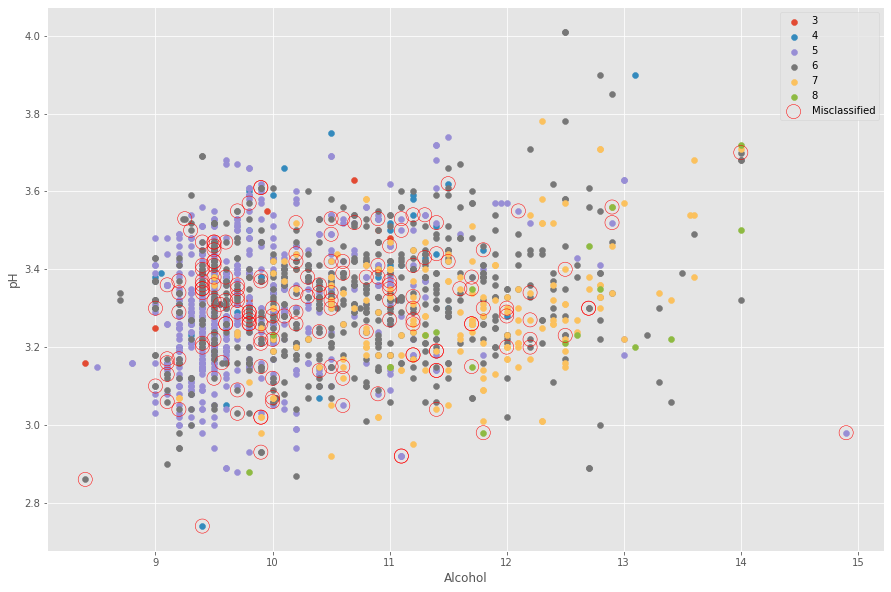

In [31]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for quality, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=quality)
    
# Plot misclassified.
ax.scatter(misclass['alcohol'], misclass['pH'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

# Using all Possible Inputs
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
***

In [32]:
# Load in the red wine data from the url
df = pd.read_csv("https://raw.githubusercontent.com/John-Dubber/EmergingTechnologiesAssessment/main/winequality/winequality-red.csv")

In [33]:
# Split the data frame in two
train, test = mod.train_test_split(df)

In [35]:
# Use all possible inputs
inputs, outputs = train[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','density','pH','sulphates','alcohol']], train['quality']

In [37]:
# Create a new classifier
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on the red wine data
lre.fit(inputs, outputs)

C:\Users\jonny\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [38]:
# Ask the classifier to classify the test data
predictions = lre.predict(test[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','density','pH','sulphates','alcohol']])
predictions

array([5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6,
       6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 7, 5, 5,
       6, 5, 7, 5, 5, 6, 7, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 7, 6, 7, 6, 6,
       6, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6,
       5, 5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7,
       5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 5, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6,
       6, 7, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 7,
       5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 7, 5, 7, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 7, 7, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6,
       6, 7, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5,

In [39]:
# Eyeball the misclassifications
(predictions == test['quality']).value_counts()

True     217
False    183
Name: quality, dtype: int64

In [41]:
# What proportion were correct?
lre.score(test[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','density','pH','sulphates','alcohol']],test['quality'])

0.5425

# K Nearest Neighbours Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
***

In [44]:
# Load in the red wine data from the url
df = pd.read_csv("https://raw.githubusercontent.com/John-Dubber/EmergingTechnologiesAssessment/main/winequality/winequality-red.csv")

In [45]:
# Split the data frame in two
train, test = mod.train_test_split(df)

In [46]:
# Use all possible inputs
inputs, outputs = train[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','density','pH','sulphates','alcohol']], train['quality']

In [48]:
# Classifier
knn = nei.KNeighborsClassifier()

In [49]:
# Fit
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [51]:
# Test
knn.score(test[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','density','pH','sulphates','alcohol']], test['quality'])

0.5025

In [53]:
# Predict.
predictions = lre.predict(test[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','density','pH','sulphates','alcohol']])
(predictions == test['quality']).value_counts()

True     236
False    164
Name: quality, dtype: int64

In [54]:
# The score is just the accuracy in this case
(predictions == test['quality']).value_counts(normalize=True)

True     0.59
False    0.41
Name: quality, dtype: float64

# Conclusion
***

I believe that there are other factors at play interfering with the data to cause such deviation.
Perhaps it is because quality in this case is a preceved quality and is not scientifically measurable.
The other is that further data is required to improve the accuracy. Considering the number of factors at play and range of qualities a 60% accuracy is probably better than I can tell wine quality apart

***
# End